In [1]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import pandas as pd
import numpy as np

Imports modules.

In [2]:
frame = pd.read_csv('zscore_final_metric.csv', index_col = 0)
express = pd.read_csv('data_ten_hours.csv', index_col = 0)

Reads dataframes of the metric for each gene under each stimulus condition and of the original expresssion data.

In [3]:
signatures = pd.DataFrame()
num_of_genes = 50

for col in frame:
    signature_per_gene = frame.index[np.argsort(frame[col].tolist())[-num_of_genes:]][::-1]
    signatures[col] = signature_per_gene

signatures.T.to_csv('signatures.txt', sep = '\t', header = False)

Builds a new data frame of signatures of the 50 genes with the highest metric value for each condition and outputs the signature file.

In [4]:
axes_size = len(signatures.columns)
heatmap_to_plot = np.zeros((axes_size, axes_size))

for i in range(axes_size):
    for j in range(axes_size):
        heatmap_to_plot[i][j] = np.sum(
            express[express.columns[j]][signatures[signatures.columns[i]].tolist()]) / num_of_genes

Determines how closely a stimulus matches a signature by calculating the average expression for all the genes within the signature.

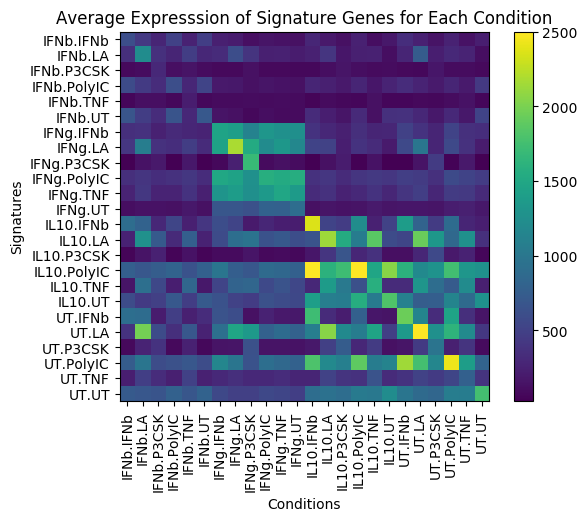

In [6]:
plt.imshow(heatmap_to_plot, vmax = 2500)
plt.title('Average Expresssion of Signature Genes for Each Condition')
plt.xticks(np.arange(axes_size), signatures.columns, rotation = 90)
plt.yticks(np.arange(axes_size), signatures.columns)
plt.xlabel('Conditions')
plt.ylabel('Signatures')
plt.colorbar()

plt.show()

Plots which conditions correspond the most to which stimulus. Ideally, a yellow diagonal should be seen.